<a href="https://colab.research.google.com/github/MeryemCiftciAly/First-Data-Analysis-SQL-CO2/blob/main/Interview_with_Python_on_Sanctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1_AWGhYKQSsXyzBFZP3cH-f65h_SsjasW" width="100%" />




## **Introduction**

This project explores international sanctions data to understand how countries behave when imposing sanctions, whether independently (**unilateral**) or jointly (**multilateral**). Using Excel, SQL, and Python, the analysis uncovers trends, patterns, and insights that shape global sanction dynamics.

---

## **About the Analyst**

My name is **Kamara Meryem Rowe-Ciftci**. I transitioned into data analytics from a business operations background, bringing a strong foundation in problem-solving and critical thinking.  
I believe that effective data analysis requires not only knowing how to extract answers from a dataset but also the curiosity to follow unexpected paths. That curiosity often reveals insights that are hidden at first glance, leading to creative and meaningful outcomes.

**Data Analyst** | [LinkedIn Profile](https://www.linkedin.com/in/meryack)

---


In [ ]:
!pip install gdown pandas openpyxl


In [ ]:
file_id = '1wmQeqAJHE8ODOeKn-iGV1otEqPLn9W_M'
url = f"https://drive.google.com/uc?id={file_id}"

**Getting the data viewing a snapshot:** Using Python to install 'gdown' to access the specific file in Google Drive. This allows users to load the dataset automatically without manual uploads or broken paths. Here you see below a the first 10 rows for the dataset


In [ ]:
import gdown
import pandas as pd

# Downloading the file without the extra codes shown
gdown.download(url, "GSDB_V4_Update.xlsx", quiet=False)

# Reading the file and desplaying it as an Excel structure
data = pd.read_excel("GSDB_V4_Update.xlsx", engine="openpyxl")

# Preview first 10 rows
data.head(10)


Downloading...
From: https://drive.google.com/uc?id=1wmQeqAJHE8ODOeKn-iGV1otEqPLn9W_M
To: /content/GSDB_V4_Update.xlsx
100%|██████████| 119k/119k [00:00<00:00, 4.32MB/s]


,case_id,sanctioned_state,sanctioning_state,begin,end,trade,descr_trade,arms,military,financial,travel,other,target_mult,sender_mult,objective,success
0,1,German Democratic Republic,Germany,1905-05-02,1905-05-26,0,NaN,0,0,0,0,1,0,0,territorial_conflict,success_total
1,2,Pakistan,India,1905-05-02,1905-05-04,1,"exp_compl,imp_compl",0,0,0,0,0,0,0,policy_change,nego_settlement
2,3,Bulgaria,United States,1905-05-03,1905-05-16,0,NaN,0,0,1,0,0,0,0,destab_regime,success_part
3,4,Bulgaria,United States,1905-05-03,1905-05-19,0,NaN,0,0,0,0,1,0,0,destab_regime,failed
4,5,Bulgaria,United States,1905-05-03,1905-05-12,0,NaN,0,0,0,1,0,0,0,destab_regime,success_part
5,6,China,CoCom,1905-05-03,1905-06-07,1,exp_part,0,0,0,0,0,0,1,destab_regime,nego_settlement
6,7,China,New Zealand,1905-05-03,1905-05-09,1,exp_part,0,0,0,0,0,0,0,destab_regime,failed
7,8,China,Organization of American States,1905-05-03,1905-06-07,1,exp_part,0,0,0,0,0,0,1,destab_regime,failed
8,9,China,South Africa,1905-05-03,1905-06-07,1,exp_part,0,0,0,0,0,0,0,destab_regime,failed
9,10,China,United Kingdom,1905-05-03,1905-05-09,1,exp_part,0,0,0,0,0,0,0,destab_regime,failed


## **Questions to Query the Dataset**

Below are the key analytical questions selected to explore the behavior and patterns of international sanctions.

1. **What are the most common sanctions applied to elicit compliance**, whether in policy, human rights, or regime-related behavior?  
2. **Is a first sanction effective as a deterrent**, or does compliance typically occur after multiple sanctions targeting different objectives?  
3. **What was the first recorded instance of sanctions**, and who were the primary senders and targets involved?  
4. **When organizations (e.g., UN, EU) are involved**, what are the primary reasons for sanctioning a country?  
5. **How many sanctions are imposed by organizations versus individual countries**, and in how many cases do multiple countries (not under one organization) act together to impose sanctions?

---

These questions were designed to **query the dataset** and uncover insights into how sanctions function across **multilateral and unilateral actors**, including both **country-led and organization-led** sanctions.


### Data Source

This analysis uses data from the **Global Sanctions Database (GSDB)** — a project jointly maintained by:

- **Drexel University**, Center for Global Policy Analysis (3220 Market St, Philadelphia, PA 19104, USA)  
- **Hochschule Konstanz University of Applied Sciences**, Alfred Wachtel-Strasse 8, 78462 Konstanz, Germany  
- **Austrian Institute of Economic Research (WIFO)**, Arsenal Objekt 20, Vienna, Austria  

For more information visit the official website:  
🔗 [https://www.globalsanctionsdatabase.com/](https://www.globalsanctionsdatabase.com/)




---




##**Question 1**




**What are the most common sanctions applied to elicit compliance** This could be in the form of policy, human rights, or regime-related behavior?  



In [ ]:
import pandas as pd

# Load dataset from Google Drive
url = "https://drive.google.com/uc?id=1wmQeqAJHE8ODOeKn-iGV1otEqPLn9W_M"
df = pd.read_excel(url)

#Select sanction-related columns
sanction_cols = ['trade', 'arms', 'military', 'financial', 'travel', 'other']

#Count how many times each sanction type was applied (assuming 1 = applied)
sanction_counts = df[sanction_cols].sum().sort_values(ascending=False)

#Display the results as a table

top_sanctions = sanction_counts.index[:3]

print(f"The most frequently applied sanctions are - the most common is {top_sanctions[0]}\n")
print(f"The second most common sanction is {top_sanctions[1]}\n")
print(f"The third most common sanction is {top_sanctions[2]}\n")

#Print the result in a table format

sanction_table = sanction_counts.reset_index()
sanction_table.columns = ['Sanction Type', 'Frequency']
sanction_table



The most frequently applied sanctions are - the most common is financial

The second most common sanction is trade

The third most common sanction is travel



,Sanction Type,Frequency
0,financial,882
1,trade,588
2,travel,422
3,arms,280
4,military,251
5,other,238


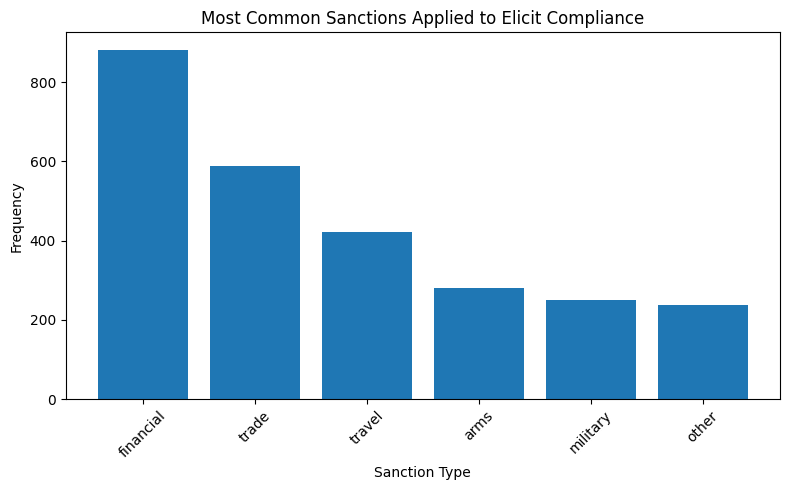

In [ ]:
import matplotlib.pyplot as plt

# Create bar chart
plt.figure(figsize=(8,5))
plt.bar(sanction_table['Sanction Type'], sanction_table['Frequency'])
plt.title('Most Common Sanctions Applied to Elicit Compliance')
plt.xlabel('Sanction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


##**Question 2**
**Is a first sanction effective as a deterrent**, or does compliance typically occur after multiple sanctions targeting different objectives?



In [ ]:
# Group by the sanctioned country to count how many sanctions each received
sanctioned_summary = (
    df.groupby('sanctioned_state')
      .agg(total_sanctions=('sanctioned_state', 'count'),
           final_outcome=('success', 'last'))
      .reset_index()
)

# Simplify outcomes into compliance vs non-compliance
sanctioned_summary['compliance'] = sanctioned_summary['final_outcome'].isin(['success_total', 'success_partial'])

# Categorize into single vs multiple sanctions
sanctioned_summary['sanction_category'] = sanctioned_summary['total_sanctions'].apply(
    lambda x: 'Single sanction' if x == 1 else 'Multiple sanctions'
)

# Calculate compliance rate by sanction frequency
deterrence_summary = (
    sanctioned_summary.groupby('sanction_category')['compliance']
    .mean()
    .reset_index()
)

print("Compliance rate by number of sanctions applied:\n")
deterrence_summary


Compliance rate by number of sanctions applied:



,sanction_category,compliance
0,Multiple sanctions,0.090278
1,Single sanction,0.214286


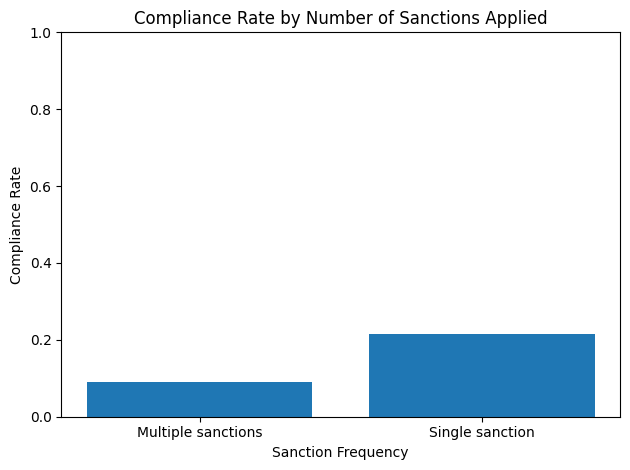

In [ ]:
import matplotlib.pyplot as plt

plt.bar(deterrence_summary['sanction_category'], deterrence_summary['compliance'])
plt.title('Compliance Rate by Number of Sanctions Applied')
plt.xlabel('Sanction Frequency')
plt.ylabel('Compliance Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


**Observation:**
Preliminary analysis indicates that single sanctions appear to have a higher success rate **around 21%** compared to multiple sanctions **around 9%** when measured by compliance or partial success outcomes.

**Interpretation:**
This suggests that in many cases, a single, well-targeted sanction may be more effective in eliciting behavioral change than applying multiple sanctions over time.

However, **this finding opens up a deeper line of curiosity**:


*  **Why do some countries face multiple sanctions if a single sanction especially financial tends to be more effective?**

*  *Is it possible that the first sanction in those multi-sanction cases was not the decisive one, for example, perhaps an arms or travel sanction was applied before a financial sanction?*

*   *Could the type or sequence of sanctions be the key factor influencing compliance rather than the number alone?*


---


I would like to look into this further to understand when multiple santantions are applied was financial sanction part of that multi sanction. If it was, then was it the first sanction applied? In cases where it was the first sanction applied and there was no compliance, then there may be cases when single financial sanctions are not deterrance enough.



In [ ]:
# To answer this question we need to do a few things looking at how many times a country was sanctioned multiple times

# Identify single vs multi
single = df[df['target_mult'] == 0]
multi = df[df['target_mult'] == 1]

print("Single-target sanctions:", len(single))
print("Multi-target sanctions:", len(multi))



Single-target sanctions: 1479
Multi-target sanctions: 68


In [ ]:
# We want to see how many single versus multiple sanctions succed or fail

import pandas as pd

# --- Identify single vs multi sanctions ---
single = df[df['target_mult'] == 0]
multi = df[df['target_mult'] == 1]

# --- Count outcomes ---
single_outcomes = single['success'].value_counts()
multi_outcomes = multi['success'].value_counts()

# --- Convert to DataFrame (with percentages) ---
single_outcomes_df = pd.DataFrame({
    'Outcome': single_outcomes.index,
    'Count': single_outcomes.values,
    'Percentage': (single_outcomes.values / len(single) * 100).round(2)
})

multi_outcomes_df = pd.DataFrame({
    'Outcome': multi_outcomes.index,
    'Count': multi_outcomes.values,
    'Percentage': (multi_outcomes.values / len(multi) * 100).round(2)
})

# --- Display ---
print("Single Sanction Outcomes:")
display(single_outcomes_df)

print("\nMulti Sanction Outcomes:")
display(multi_outcomes_df)



Single Sanction Outcomes:


,Outcome,Count,Percentage
0,ongoing,398,26.91
1,success_total,312,21.10
2,failed,214,14.47
3,"ongoing,ongoing",135,9.13
4,success_part,108,7.30
5,nego_settlement,63,4.26
6,"success_total,success_total",59,3.99
7,"failed,failed",36,2.43
8,"ongoing,ongoing,ongoing",35,2.37
9,"success_part,success_part",32,2.16



Multi Sanction Outcomes:


,Outcome,Count,Percentage
0,ongoing,30,44.12
1,success_total,16,23.53
2,failed,6,8.82
3,"ongoing,ongoing",5,7.35
4,"failed,failed",4,5.88
5,"success_total,failed",2,2.94
6,"success_total,success_total,success_total",1,1.47
7,"success_total,success_total",1,1.47
8,"success_part,success_part,success_part",1,1.47
9,success_part,1,1.47


###**So then, why do some countries face multiple sanctions if a single sanction especially financial tends to be more effective?**

##**The results shows:** A strong imbalance in how often each sanction type is applied:

- **Single sanctions:** 1,479 cases  
- **Multi-sanctions:** 68 cases

> **Important:** Because these groups differ drastically in size, their success percentages **cannot be directly compared**. The denominators (1,479 vs. 68) introduce analytical limitations.

---

## What the dataset shows

### 1. Multi-sanctions are applied far less often
Only **68** cases involve multiple sanctions, suggesting they may be reserved for more complex or strategic situations.

### 2. Multi-sanctions show a stronger success pattern *within their own group*
- **Success (total + partial): 23.53%**  
- **Failure:** 8.82%

This indicates that, when multi-sanctions are used, they are more likely to succeed than to fail **within that small group**.

### 3. Single sanctions show only a modest success advantage
- **Success (total + partial): 21.10%**  
- **Failure:** 14.47%

The gap between success and failure is narrower than what we observe in multi-sanctions.

---

## Insight

- **Within their own populations:** multi-sanctions appear more effective, while single sanctions show only a marginal advantage over failure.
- This pattern may explain why policymakers sometimes escalate to multi-sanction packages: such packages may produce stronger or more consistent outcomes in certain cases.

---

## Limitation (Dataset Limitation)

- The sample sizes are **very different** (1,479 vs. 68). Therefore, comparing **21.10% vs. 23.53%** across groups is statistically unreliable.
- The dataset **does not** show which specific sanction within a multi-sanction package produced success. We can observe co-occurrence patterns (e.g., whether financial measures appear), but **cannot** infer causality.

---

> **Conclusion (cautious):** Yes, single sanctions are far more frequently applied in the dataset. Although multi-sanction cases show a higher success rate *within their small sample*, the dramatic difference in group sizes and the dataset's limitations prevent a definitive claim that multi-sanction packages are generally more effective. We can report descriptive patterns, but not causal attribution. Also, the limitation of the data does not allow insights on whether a specific sanction was the cause of success or failure. So, it is not possible to tell if financial sanction was included in a multi-sanction.


##**Question 3**

What was the first recorded instance of sanctions, and who were the primary senders and targets involved?

In [ ]:
# Find the earliest sanction date
earliest_date = df['begin'].min()

# Select all rows with that minimum date and include more context columns
first_sanction_full = df[df['begin'] == earliest_date][[
    'begin',
    'sanctioning_state',
    'sanctioned_state',
    'objective',
    'success'

]]


first_sanction_full

,begin,sanctioning_state,sanctioned_state,objective,success
0,1905-05-02,Germany,German Democratic Republic,territorial_conflict,success_total
1,1905-05-02,India,Pakistan,policy_change,nego_settlement


##**Question 4**

When organizations (e.g., UN, EU) are involved, what are the primary reasons for sanctioning a country?

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)

# Identify the organization (non-countries) in the dataset that are sanctioning other countries or organizations
org_list = [
    "CoCom",
    "Organization of American States",
    "League of Arab States",
    "UN",
    "ChinCom",
    "NATO",
    "Organisation of African Unity",
    "OAPEC",
    "EU",
    "EEC",
    "Organization of Eastern Carribean States",
    "Commonwealth",
    "Paris Agreement Signatories",
    "CSCE",
    "ECOWAS",
    "FRY",
    "G8",
    "NAFTA",
    "SADC",
    "MERCOSUR",
    "UNASUR",
    "OIC",
    "Kimberly Process Participants",
    "G7"
]

# Total sanctions per organization
org_counts = org_sanctions['sanctioning_state'].value_counts()

# Top objective per organization
top_objective = (
    org_sanctions.groupby('sanctioning_state')['objective']
    .agg(lambda x: x.value_counts().idxmax())
)

# Combine into a summary dataframe
org_summary_table = pd.DataFrame({
    'total_sanctions': org_counts,
    'top_objective': top_objective
}).reset_index().rename(columns={'index': 'organization'})

org_summary_table


,sanctioning_state,total_sanctions,top_objective
0,CSCE,2,end_war
1,ChinCom,1,destab_regime
2,CoCom,2,destab_regime
3,Commonwealth,10,democracy
4,ECOWAS,15,democracy
5,EEC,12,end_war
6,EU,113,democracy
7,FRY,1,prevent_war
8,G8,2,prevent_war
9,Kimberly Process Participants,1,end_war


## **Question 5**

How many sanctions are imposed by organizations versus individual countries, and in how many cases do multiple countries (not under one organization) act together to impose sanctions?

In [ ]:
#First define what countires are organizations within the data
# --- Step 1: Your organizations list ---
org_list = [
    "CoCom","Organization of American States","League of Arab States","UN","ChinCom","NATO",
    "Organisation of African Unity","OAPEC","EU","EEC","Organization of Eastern Carribean States",
    "Commonwealth","Paris Agreement Signatories","CSCE","ECOWAS","FRY","G8","NAFTA","SADC",
    "MERCOSUR","UNASUR","OIC","Kimberly Process Participants","G7"
]

# --- Step 2: Define which rows are orgs and which are countries ---
org_df = df[df['sanctioning_state'].isin(org_list)]
country_df = df[~df['sanctioning_state'].isin(org_list)]

# --- Step 3: Count single vs multi (0 = single, 1 = multi) ---
org_single = (org_df['sender_mult'] == 0).sum()
org_multi  = (org_df['sender_mult'] == 1).sum()

country_single = (country_df['sender_mult'] == 0).sum()
country_multi  = (country_df['sender_mult'] == 1).sum()

# --- Step 4: Summary table ---
summary_df = pd.DataFrame({
    'Type': ['Organizations', 'Countries'],
    'Single Sanctions': [org_single, country_single],
    'Multi Sanctions':  [org_multi, country_multi]
})

summary_df



,Type,Single Sanctions,Multi Sanctions
0,Organizations,3,283
1,Countries,1145,116


##**Conclusion**

Financial and trade sanctions stand out as the most commonly applied measures in the dataset. However, based on the available information, it is not possible to determine which specific sanction,or combination of sanctions, is truly effective in achieving compliance.

What the data suggests instead is that sanctions function more as accumulated pressure rather than precise levers of influence. Compliance does not appear to follow a consistent pattern. Rather, it seems to occur only when the pressure becomes too great for the sanctioned country to tolerate.

What happens next, or how long pressure must be applied before a country changes course, cannot be concluded from this dataset. Ultimately, the timing and willingness to comply rests entirely with the sanctioned country.

